In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

%matplotlib inline


In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Spandana\\Desktop\\PROJECT'

In [4]:
full_data = pd.read_csv("bank.csv")

In [5]:
full_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,NaN,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,NaN,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,NaN,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,NaN,yes


In [6]:
display(full_data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#dimensions of dataset
print("The dataset has",full_data.shape[1],"columns and", full_data.shape[0],"rows")

The dataset has 21 columns and 41188 rows


In [9]:
#columns/features
full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
# Calculate number of customers
n_customers = len(full_data)

# Calculate number of features
n_features = len(full_data.columns[:-1])     # 20 Feature cols and 1 target col 

# Calculate reponded customers
n_subscribed = len(full_data[full_data['y'] == 'yes'])

# Calculate not responded customers
n_not_subscribed = len(full_data[full_data['y'] == 'no'])

# Calculate response rate
response_rate = n_subscribed/(n_customers)*100

# Print the results
print("Total number of customers: {}".format(n_customers))
print("Number of features: {}".format(n_features),"(and 1 target variable)")
print("Number of customers who subscribed: {}".format(n_subscribed))
print("Number of customers who did not subscribe: {}".format(n_not_subscribed))
print("Response rate of customers: {:.2f}%".format(response_rate))

Total number of customers: 41188
Number of features: 20 (and 1 target variable)
Number of customers who subscribed: 4640
Number of customers who did not subscribe: 36548
Response rate of customers: 11.27%


In [11]:
display(full_data.describe())


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,7763.0
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5191.0
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,0.0
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,5191.0
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5191.0
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.0
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5191.0
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5191.0


<AxesSubplot:xlabel='y', ylabel='count'>

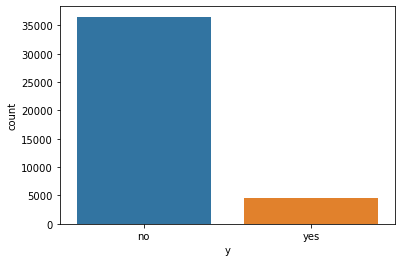

In [12]:
#plot for class/target variable
sns.countplot(x='y',data=full_data)

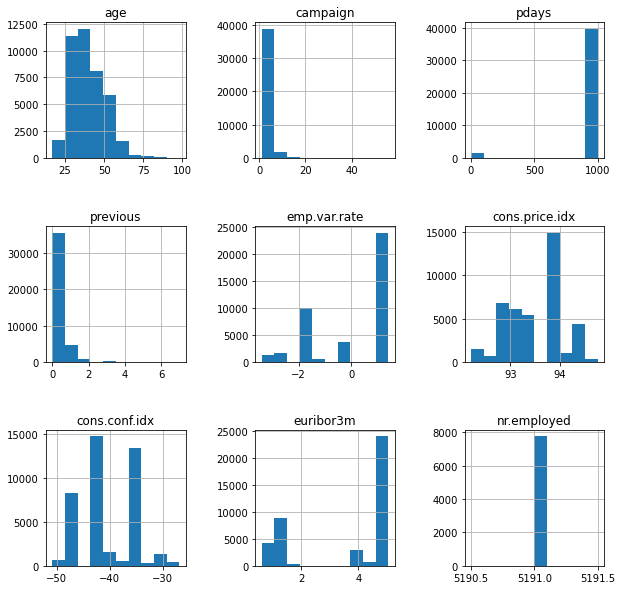

In [13]:
#visualizing features of dataset
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
full_data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

C:\Users\Spandana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Spandana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Spandana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Span

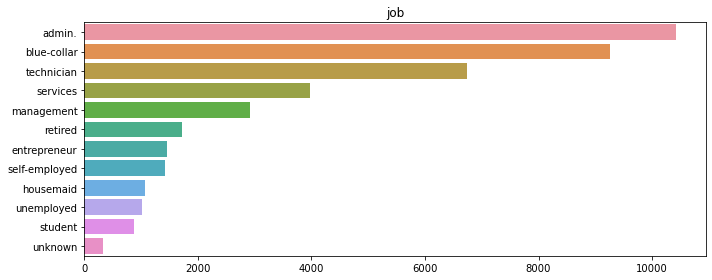

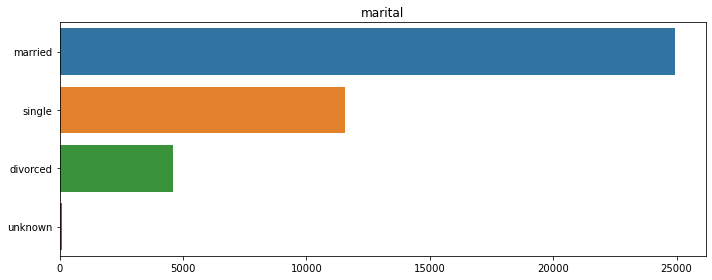

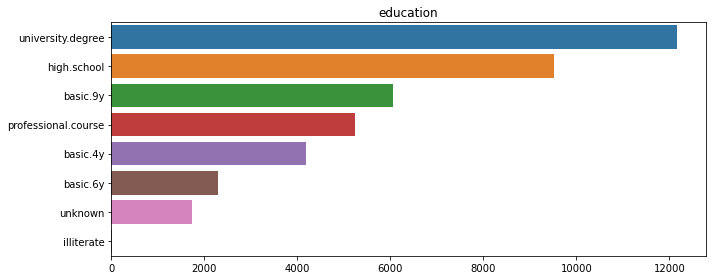

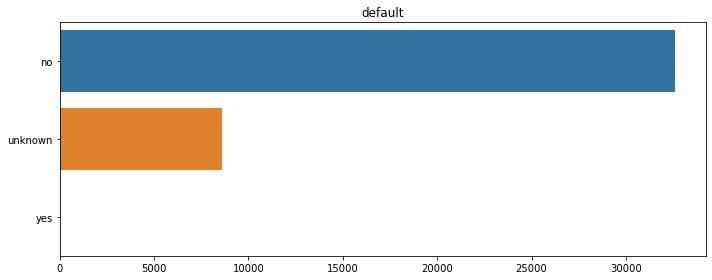

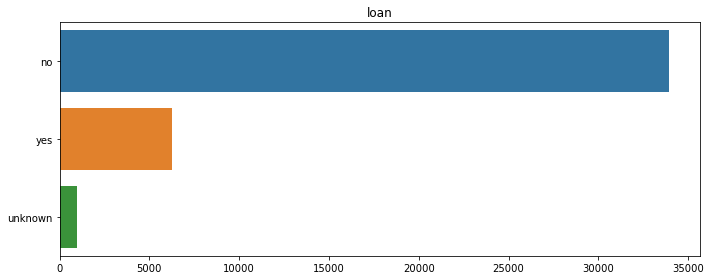

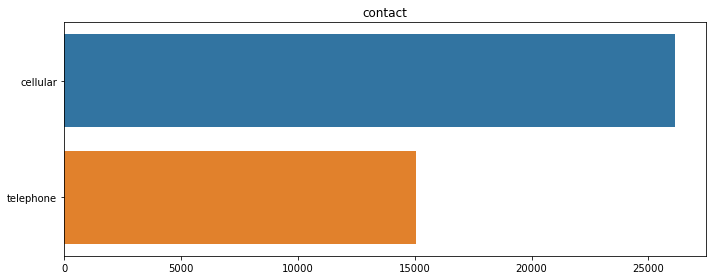

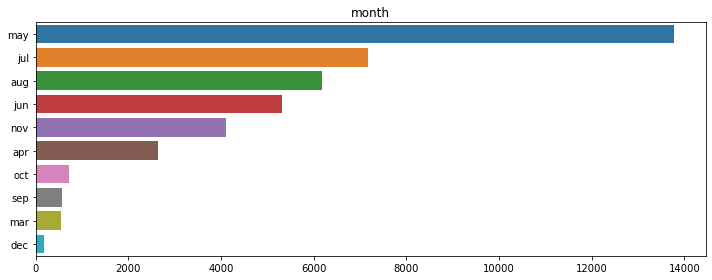

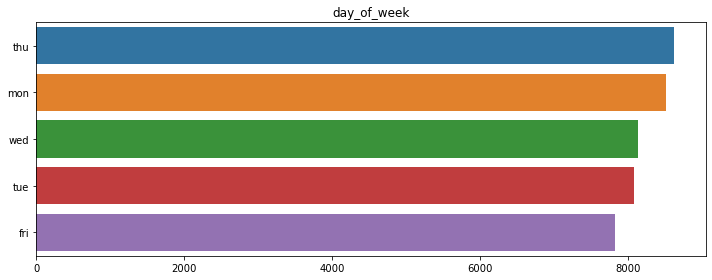

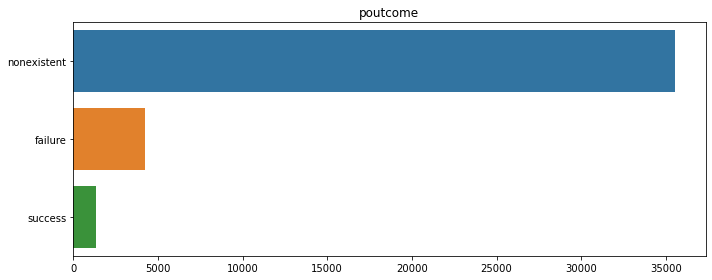

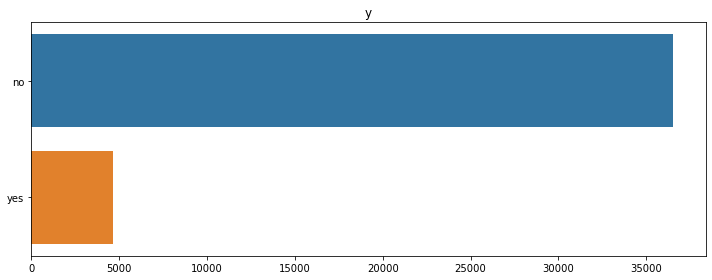

In [14]:
#bar graphs for all features - values
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(full_data[col].value_counts().values, full_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'duration'),
  Text(0, 2.5, 'campaign'),
  Text(0, 3.5, 'pdays'),
  Text(0, 4.5, 'previous'),
  Text(0, 5.5, 'emp.var.rate'),
  Text(0, 6.5, 'cons.price.idx'),
  Text(0, 7.5, 'cons.conf.idx'),
  Text(0, 8.5, 'euribor3m'),
  Text(0, 9.5, 'nr.employed')])

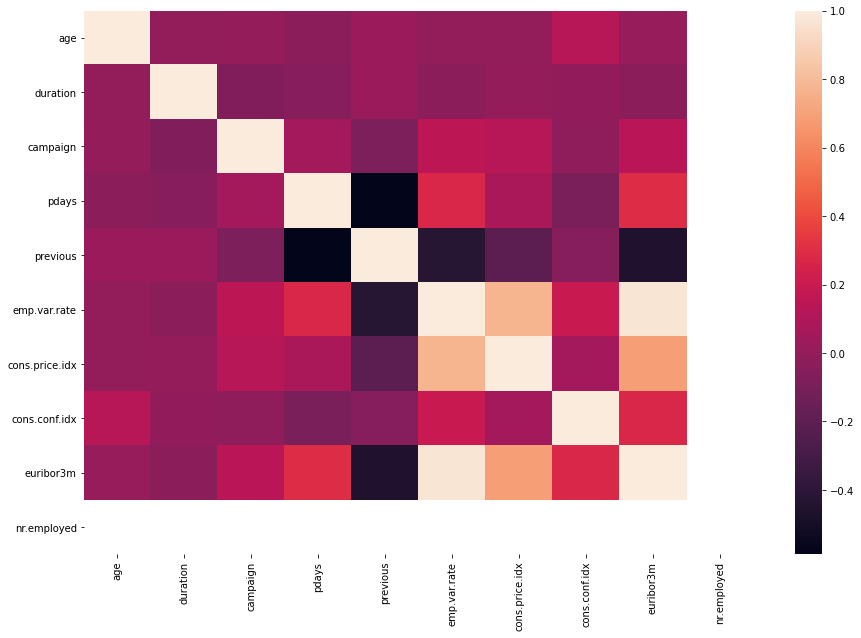

In [15]:
# visualize correlations of features with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(full_data.corr())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [16]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

full_data = preprocess_features(full_data)
print("Processed feature columns ({} total features):\n{}".format(len(full_data.columns), list(full_data.columns)))

Processed feature columns (55 total features):
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [17]:
# Extract feature columns
feature_cols = list(full_data.columns[:-1])

# Extract target column 'responded'
target_col = full_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = full_data[feature_cols]
y_all = full_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Target column: y

Feature values:
   age  job_admin.  job_blue-

In [18]:
#checking for no. of missing values in each column
X_all.isnull().sum()

age                                  0
job_admin.                           0
job_blue-collar                      0
job_entrepreneur                     0
job_housemaid                        0
job_management                       0
job_retired                          0
job_self-employed                    0
job_services                         0
job_student                          0
job_technician                       0
job_unemployed                       0
marital_divorced                     0
marital_married                      0
marital_single                       0
education_basic.4y                   0
education_basic.6y                   0
education_basic.9y                   0
education_high.school                0
education_illiterate                 0
education_professional.course        0
education_university.degree          0
default                           8597
housing                            990
loan                               990
contact_cellular         

In [19]:
#before dropping nr.employed column
print(X_all.columns)

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euri

In [20]:
X_all.drop('nr.employed',  axis=1, inplace=True)

C:\Users\Spandana\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
print(X_all.columns)

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euri

In [22]:
X_all.fillna(X_all.median(), inplace=True)
X_all.describe()

C:\Users\Spandana\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,campaign,pdays,previous,poutcome_failure,poutcome_nonexistent,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,...,2.567593,962.475454,0.172963,0.103234,0.863431,0.033335,0.081886,93.575664,-40.502600,3.621291
std,10.42125,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,...,2.770014,186.910907,0.494901,0.304268,0.343396,0.179512,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,999.000000,0.000000,0.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,999.000000,0.000000,0.000000,1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,999.000000,0.000000,0.000000,1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000


In [23]:
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (53 total features):
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


In [24]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

%matplotlib inline

In [25]:
validation_size = 0.30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation/Test set 'yes' pct = {:.2f}%".format(100 * (y_test == 1).mean()))
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_test.shape[0]))

Train set 'yes' pct = 11.27%
Validation/Test set 'yes' pct = 11.26%
Training set has 28831 samples.
Validation set has 12357 samples.



Predictions of class label:
[0 0 0 ... 0 0 0]
Accuracy of logistic regression classifier on test set: 90.69


Some detailed Analysis 
Confusion Matrix :
[[10686   279]
 [  871   521]]
Accuracy Score : 90.69353402929514

Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10965
           1       0.65      0.37      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.91      0.90     12357



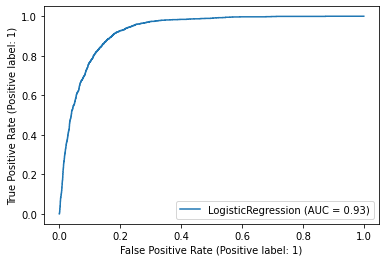

In [26]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

logmodel = LogisticRegression(C=0.0008)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print("\nPredictions of class label:")
print(predictions)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)*100))

results = confusion_matrix(y_test,predictions)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, predictions)*100)

print('\nClassification Report : ')

print (classification_report(y_test, predictions))

plot_roc_curve(logmodel, X_test, y_test)

plotresults=[]
plotnames=[]
plotresults.append(accuracy_score(y_test, predictions))
plotnames.append('LR')


Predictions of class label:
[0 0 0 ... 0 1 0]
Accuracy Score Using Decision Tress classifier:
88.66229667395


Some detailed Analysis 
Confusion Matrix :
[[10248   717]
 [  684   708]]
Accuracy Score : 88.66229667395
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10965
           1       0.50      0.51      0.50      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



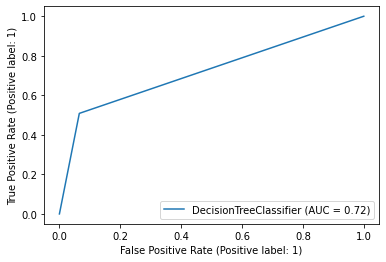

In [27]:
from sklearn import tree
from sklearn.metrics import plot_roc_curve

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = (clf.predict(X_test))
print("\nPredictions of class label:")
print(y_pred)
print ('Accuracy Score Using Decision Tress classifier:')
print(accuracy_score(y_test, y_pred)*100)
results = confusion_matrix(y_test,y_pred)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, y_pred)*100)

print('Classification Report : ')

print (classification_report(y_test, y_pred))

plot_roc_curve(clf, X_test, y_test)


Predictions of class label:
[1 0 0 ... 0 1 0]
Accuracy Using Random Forest Classifier: 90.97677429796876


Some detailed Analysis 
Confusion Matrix :
[[10655   310]
 [  805   587]]
Accuracy Score : 90.97677429796876
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.42      0.51      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



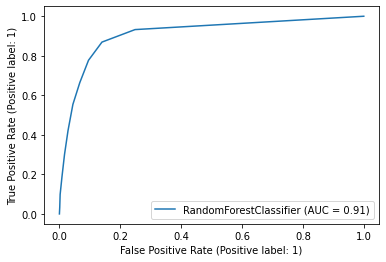

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


print("\nPredictions of class label:")
print(y_pred)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Using Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred)*100)


results = confusion_matrix(y_test,y_pred)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, y_pred)*100)

print('Classification Report : ')

print (classification_report(y_test, y_pred))

plot_roc_curve(clf, X_test, y_test)

[19:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predictions of class label:
[1 0 0 ... 0 0 0]
Accuracy Using XG Boost Classifier: 91.04151493080846


Some

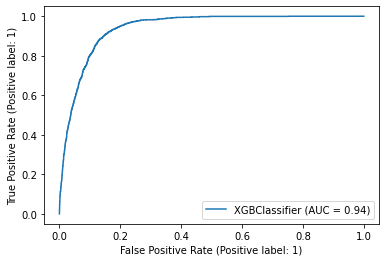

In [29]:
import xgboost as xgb

model=xgb.XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)
print(model)

y_pred=model.predict(X_test)
print("\nPredictions of class label:")
print(y_pred)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Using XG Boost Classifier:",metrics.accuracy_score(y_test, y_pred)*100)

results = confusion_matrix(y_test,y_pred)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, y_pred)*100)

print('Classification Report : ')

print (classification_report(y_test, y_pred))

plot_roc_curve(model, X_test, y_test)


Accuracy Score Using MLP classifier:
89.86809096058914


Some detailed Analysis 
Confusion Matrix :
[[10101   864]
 [  388  1004]]
Accuracy Score : 89.86809096058914
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10965
           1       0.54      0.72      0.62      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.82      0.78     12357
weighted avg       0.92      0.90      0.90     12357



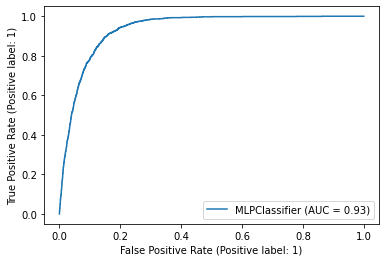

In [30]:
from sklearn.neural_network import MLPClassifier

mlpmodel = MLPClassifier()
mlpmodel.fit(X_train, y_train)
#print('\n\n',model)

preds = mlpmodel.predict(X_test)

from sklearn.metrics import accuracy_score
# Evaluate accuracy
print ('\nAccuracy Score Using MLP classifier:')
print(accuracy_score(y_test, preds)*100)
results = confusion_matrix(y_test,preds)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, preds)*100)

print('Classification Report : ')

print (classification_report(y_test, preds))

plot_roc_curve(mlpmodel, X_test, y_test)

In [31]:
import xgboost
from xgboost import XGBRFClassifier
# define the model
model = XGBRFClassifier(n_estimators=50)
model.fit(X_train, y_train)
print(model)
model.score(X_test,y_test)

[19:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=50, n_jobs=4, num_parallel_tree=50,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)


0.9164036578457554

In [32]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
     ('xgbrf', XGBRFClassifier(n_estimators=300)),
     ('lr', make_pipeline(StandardScaler(),
                           LogisticRegression()))
 ]

clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

[19:58:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Accuracy Using Stacking Classifier: 91.76984705025491


Some detailed Analysis 
Confusion Matrix :
[[10640   325]
 [  692   700]]
Accuracy Score : 91.76984705025491
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.68      0.50      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



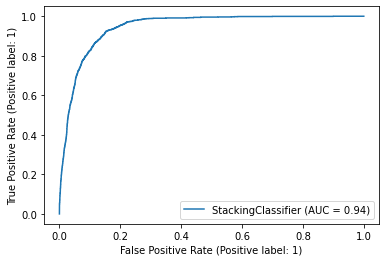

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Using Stacking Classifier:",metrics.accuracy_score(y_test, y_pred)*100)


results = confusion_matrix(y_test,y_pred)

print ('\n\nSome detailed Analysis \nConfusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, y_pred)*100)

print('Classification Report : ')

print (classification_report(y_test, y_pred))

plot_roc_curve(clf, X_test, y_test)

[7.87494357e-02 1.51876485e-02 9.56427423e-03 5.15221722e-03
 3.77452523e-03 8.38515704e-03 7.53122325e-03 5.20678357e-03
 7.49089304e-03 5.80838339e-03 1.26210056e-02 4.84984628e-03
 9.47411645e-03 1.46879307e-02 1.31575151e-02 7.51027684e-03
 5.83913616e-03 9.77415429e-03 1.43638424e-02 1.55419987e-04
 1.09972578e-02 1.46942472e-02 1.11728610e-06 3.11012611e-02
 1.95039229e-02 8.28484287e-03 7.46501380e-03 4.87043349e-03
 3.57424333e-03 1.81524221e-03 4.32445496e-03 4.48919649e-03
 8.21436013e-03 1.14568124e-02 4.90017736e-03 7.67171232e-03
 4.23004509e-03 1.34309271e-02 1.42139778e-02 1.44610290e-02
 1.39531909e-02 1.32065832e-02 2.29996086e-01 5.60460958e-02
 4.50039586e-02 1.02299392e-02 6.55996492e-03 1.17178400e-02
 3.07736123e-02 2.97921167e-02 1.80765714e-02 2.16935724e-02
 8.39664091e-02]


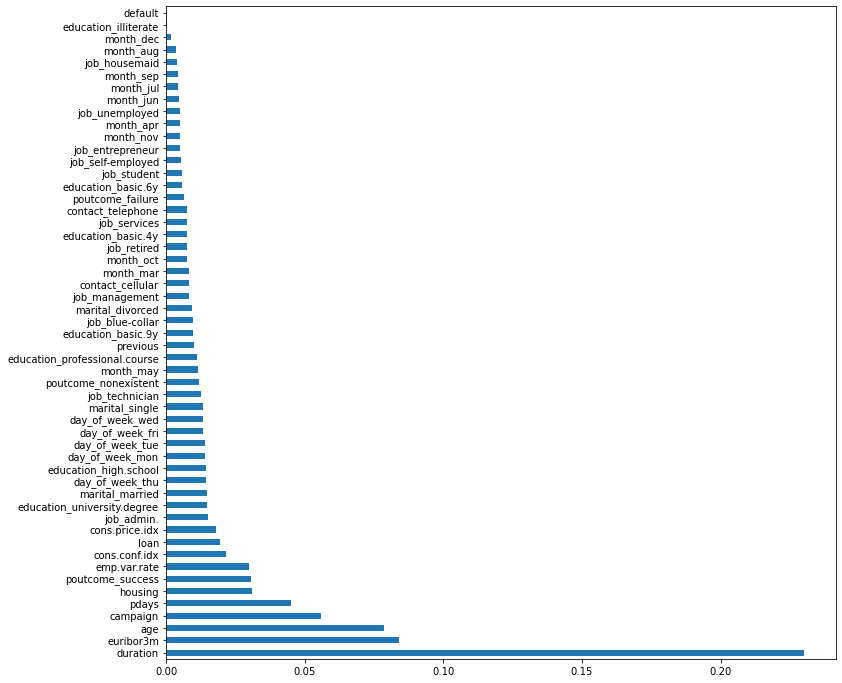

<Figure size 432x288 with 0 Axes>

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

plt.figure(figsize=(12,12))

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(55).plot(kind='barh')

plt.show()

#saving the figure
plt.savefig('feat_imp.png')

In [35]:
import pickle

# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(clf, open('model.pkl','wb'))


''''#Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
x=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1575,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])
y=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,15,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])

if 1 in x:
    print("x - Client will subscribe")
else:
    print("x - Client will not subscribe")
    
if 1 in y:
    print("y - Client will subscribe")
else:
    print("y - Client will not subscribe")'''


'\'#Loading model to compare the results\nmodel = pickle.load(open(\'model.pkl\',\'rb\'))\nx=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1575,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])\ny=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,15,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])\n\nif 1 in x:\n    print("x - Client will subscribe")\nelse:\n    print("x - Client will not subscribe")\n    \nif 1 in y:\n    print("y - Client will subscribe")\nelse:\n    print("y - Client will not subscribe")'